# Make movies from LLC

In [2]:
#!pip install git+https://github.com/jbusecke/xmovie.git

  Cloning https://github.com/jbusecke/xmovie.git to /tmp/pip-req-build-rz_g2rbw
  Running command git clone -q https://github.com/jbusecke/xmovie.git /tmp/pip-req-build-rz_g2rbw
  Created wheel for xmovie: filename=xmovie-0.1.0-py3-none-any.whl size=11002 sha256=3c74d6bbbf77ff696ddeec1782c6537b2408324bdd494ccb08e2ff4f0c86541a
  Stored in directory: /tmp/pip-ephem-wheel-cache-hq1j50o1/wheels/54/d4/a5/bb21f910f0c7f558485ddd343e43f65d90ed938755ed6bce25
Successfully built xmovie


In [1]:
# Load some useful modules 
import numpy as np
import xarray as xr
import xrft
from xmitgcm import llcreader
from matplotlib import pyplot as plt
from xmovie import Movie
import cmocean.cm as cm

In [2]:
import cmocean.cm as cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath

In [3]:
#%matplotlib inline
# this needs to be commented out so that xmovie does not crash

In [3]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")

In [4]:
# Get variables from catalog
sst = (cat.LLC4320_SST.to_dask())#.sel(face=10)
sss = (cat.LLC4320_SSS.to_dask())#.sel(face=10)
#ssh = (cat.LLC4320_SSH.to_dask()).sel(face=10)
u = (cat.LLC4320_SSU.to_dask())#.sel(face=10)
v = (cat.LLC4320_SSV.to_dask())#.sel(face=10)

In [5]:
coords = (cat.LLC4320_grid.to_dask())#.sel(face=10)

In [6]:
u.U.attrs = {'long_name': 'Zonal Velocity (m/s)', 
            'mate': 'V', 'units':'m/s'}
v.V.attrs = {'long_name': 'Meridional Velocity (m/s)', 
            'mate': 'U', 'units':'m/s'}

In [7]:
ds = xr.merge([ u, v, sst,  sss.SSS, coords])

In [8]:
ds_ll = llcreader.llcmodel.faces_dataset_to_latlon(ds, 
                metric_vector_pairs=[])

In [10]:
ds_ll

<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_p1: 2, time: 9030)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * k_p1     (k_p1) int64 0 1
    CS       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    Depth    (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    PHrefC   float32 15.4
    PHrefF   (k_p1) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    SN       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    XG       (j_g, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    YG       (j_g, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    Z        float32 -1.57
    Zl       float32 -1.0
    Zp1      (k_p1) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    Zu       float32 -2.14
    drC      (k_p1) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    drF      float32 1.14
    dxC      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    hFacC    (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    hFacS    (j_g, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    hFacW    (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(9030,), meta=np.ndarray>
    k        int64 1
    k_l      int64 1
    k_u      int64 1
    rA       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    rAs      (j_g, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    rAw      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    rAz      (j_g, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
Data variables:
    SST      (time, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    SSS      (time, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 1, 4320), meta=np.ndarray>

In [9]:
from fastjmd95 import rho
ds_ll['SSD'] = xr.apply_ufunc(rho, 
                        ds_ll.SSS, ds_ll.SST, 0, 
                        dask='parallelized', output_dtypes=[float,]).rename('SSD')

#import gsw
#ds['Spice'] = xr.apply_ufunc(gsw.spiciness0, 
#                        ds.SSS, ds.SST,  
#                        dask='parallelized', output_dtypes=[float,]).rename('Spice')

In [10]:
sel_XC = np.logical_and(ds_ll.XC>-99, ds_ll.XC<-80 ) 
sel_XG = np.logical_and(ds_ll.XG>-99, ds_ll.XG<-80 )
sel_YC = np.logical_and(ds_ll.YC>17.5, ds_ll.YC<32 )
sel_YG = np.logical_and(ds_ll.YG>17.5, ds_ll.YG<32 )

In [11]:
XC = ds_ll.XC.where(sel_XC & sel_YC, drop=True)
YC = ds_ll.YC.where(sel_XC & sel_YC, drop=True)
XG = ds_ll.XG.where(sel_XG & sel_YG, drop=True)
YG = ds_ll.YG.where(sel_XG & sel_YG, drop=True)
#XCmean = XC.mean(['j'])
#YCmean = YC.mean(['i'])

#Xmax = XC.max(['j'])
#Xmin = XC.min(['j'])
#Ymax = YC.max(['i'])
#Ymin = YC.min(['i'])

In [63]:
dXC = grid.interp(ds_ll.dxC, 'X').where(sel_XC & sel_YC, drop=True)

ValueError: `boundary` must be 'fill', 'extend' or 'extrapolate', not None.

In [63]:
dYC = grid.interp(ds_ll.dyC, 'Y', boundary='extend').where(sel_XC & sel_YC, drop=True)

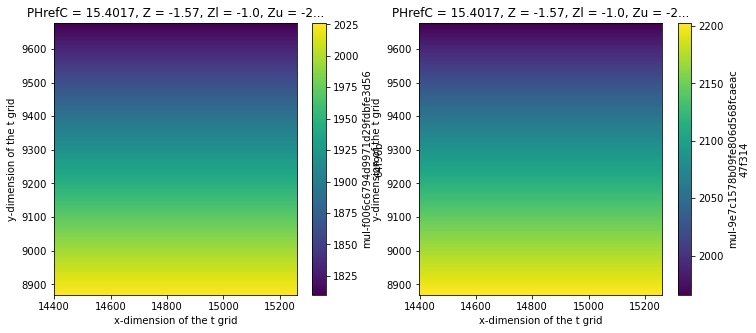

In [64]:
plt.figure(figsize=(12,5))
plt.subplot(121)
dXC.isel(i=slice(0,-1,4),j=slice(0,-1,4)).plot()

plt.subplot(122)
dYC.isel(i=slice(0,-1,4),j=slice(0,-1,4)).plot()

### Setup Variables

In [12]:
#SSH_GOM = ds_ll.Eta.where(sel_XC & sel_YC, drop=True)
SST_GOM = ds_ll.SST.sel(i=XC.i, j=XC.j)#.where(sel_XC & sel_YC, drop=True)
SSS_GOM = ds_ll.SSS.sel(i=XC.i, j=XC.j)#.where(sel_XC & sel_YC, drop=True)
SSD_GOM = ds_ll.SSD.sel(i=XC.i, j=XC.j)#.where(sel_XC & sel_YC, drop=True)
U_GOM = ds_ll.U.sel(j=XC.j, i_g=XG.i_g)
V_GOM = ds_ll.V.sel(j_g=XG.j_g, i=XC.i)

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(sl

In [13]:
ds_GOM = xr.merge([SST_GOM, SSS_GOM, SSD_GOM, U_GOM, V_GOM])

In [14]:
ds_GOM

<xarray.Dataset>
Dimensions:  (i: 912, i_g: 911, j: 836, j_g: 837, time: 9030)
Coordinates:
  * j        (j) int64 8844 8845 8846 8847 8848 ... 9675 9676 9677 9678 9679
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * i        (i) int64 14352 14353 14354 14355 14356 ... 15260 15261 15262 15263
    CS       (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
    Depth    (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
    PHrefC   float32 15.4
    SN       (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
    Z        float32 -1.57
    Zl       float32 -1.0
    Zu       float32 -2.14
    drF      float32 1.14
    hFacC    (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(9030,), meta=np.ndarray>
    k        int64 1
    k_l      int64 1
    k_u      int64 1
    rA       (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
  * i_g      (i_g) int64 14353 14354 14355 14356 ... 15260 15261 15262 15263
    dxC      (j, i_g) float32 dask.array<chunksize=(836, 911), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(836, 911), meta=np.ndarray>
    hFacW    (j, i_g) float32 dask.array<chunksize=(836, 911), meta=np.ndarray>
    rAw      (j, i_g) float32 dask.array<chunksize=(836, 911), meta=np.ndarray>
  * j_g      (j_g) int64 8843 8844 8845 8846 8847 ... 9675 9676 9677 9678 9679
    dxG      (j_g, i) float32 dask.array<chunksize=(837, 912), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(837, 912), meta=np.ndarray>
    hFacS    (j_g, i) float32 dask.array<chunksize=(837, 912), meta=np.ndarray>
    rAs      (j_g, i) float32 dask.array<chunksize=(837, 912), meta=np.ndarray>
Data variables:
    SST      (time, j, i) float32 dask.array<chunksize=(1, 836, 912), meta=np.ndarray>
    SSS      (time, j, i) float32 dask.array<chunksize=(1, 836, 912), meta=np.ndarray>
    SSD      (time, j, i) float64 dask.array<chunksize=(1, 836, 912), meta=np.ndarray>
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 836, 911), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 837, 912), meta=np.ndarray>

In [15]:
import xgcm
grid = xgcm.Grid(ds_GOM.drop(['k']), periodic=None)

In [16]:
# Vorticity
f = 2*(2*np.pi/24/3600)*np.sin(ds_GOM.YC*np.pi/180)
zeta = (-grid.diff(ds_GOM.U * ds_GOM.dxC, 'Y', boundary='extend') + grid.diff(ds_GOM.V * ds_GOM.dyC, 'X', boundary='extend'))
zeta = (grid.interp(grid.interp(zeta, 'X', boundary='extend'), 'Y', boundary='extend')/ds_GOM.rA/f).rename('Zeta_by_f')

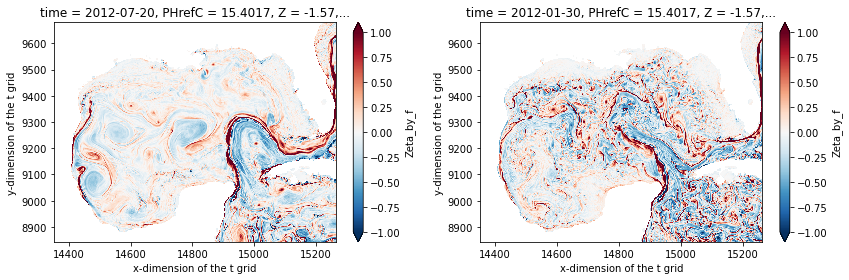

In [69]:
plt.figure(figsize=(12,4))

plt.subplot(121)
zeta.sel(time='2012-07-20T00:00:00', method='nearest').plot(vmin=-1)

plt.subplot(122)
zeta.sel(time='2012-01-30T00:00:00', method='nearest').plot(vmin=-1)

plt.tight_layout()

In [17]:
# B gradients
b_x = grid.interp(grid.diff(ds_GOM.SSD, 'X', boundary='extend')/ ds_GOM.dxC, 
                  'X', boundary='extend')
b_y = grid.interp(grid.diff(ds_GOM.SSD, 'Y', boundary='extend')/ ds_GOM.dyC, 
                  'Y', boundary='extend')
gradb = (((b_x**2 + b_y**2)**0.5)/f).rename('gradb_by_f')

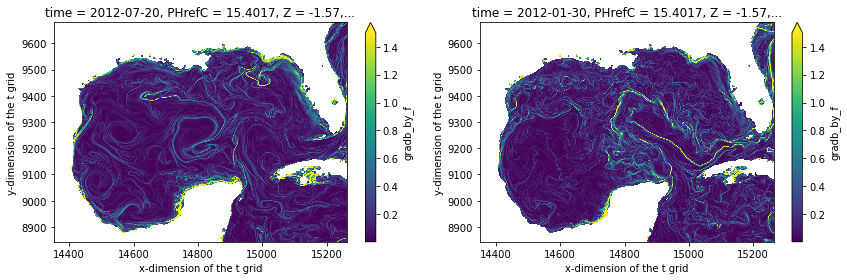

In [72]:
plt.figure(figsize=(12,4))

plt.subplot(121)
gradb.sel(time='2012-07-20T00:00:00', method='nearest').plot(vmax=1.5)

plt.subplot(122)
gradb.sel(time='2012-01-30T00:00:00', method='nearest').plot(vmax=1.5)

plt.tight_layout()

In [18]:
ds_GOM2 = xr.merge([SST_GOM, SSS_GOM, zeta, gradb])
ds_GOM2

<xarray.Dataset>
Dimensions:     (i: 912, j: 836, time: 9030)
Coordinates:
  * j           (j) int64 8844 8845 8846 8847 8848 ... 9675 9676 9677 9678 9679
  * time        (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * i           (i) int64 14352 14353 14354 14355 ... 15260 15261 15262 15263
    CS          (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
    Depth       (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
    PHrefC      float32 15.4
    SN          (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
    XC          (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
    YC          (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
    Z           float32 -1.57
    Zl          float32 -1.0
    Zu          float32 -2.14
    drF         float32 1.14
    hFacC       (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
    iter        (time) int64 dask.array<chunksize=(9030,), meta=np.ndarray>
    k           int64 1
    k_l         int64 1
    k_u         int64 1
    rA          (j, i) float32 dask.array<chunksize=(836, 912), meta=np.ndarray>
Data variables:
    SST         (time, j, i) float32 dask.array<chunksize=(1, 836, 912), meta=np.ndarray>
    SSS         (time, j, i) float32 dask.array<chunksize=(1, 836, 912), meta=np.ndarray>
    Zeta_by_f   (time, j, i) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    gradb_by_f  (time, j, i) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>

### Test plots 

In [74]:
ds_GOM_small = ds_GOM2.isel(i=slice(0,-1,2),j=slice(0,-1,2))
XC = ds_GOM_small.XC
YC = ds_GOM_small.YC 

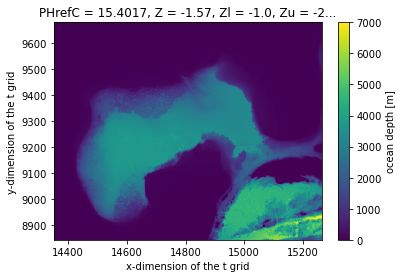

In [75]:
ds_GOM_small.Depth.plot()

(array([  394.,  1212.,   919.,  3734., 13597., 22741., 52027., 26818.,
         1355.,   193.]),
 array([25.153633, 25.750502, 26.347368, 26.944237, 27.541105, 28.137974,
        28.73484 , 29.331709, 29.928577, 30.525444, 31.122313],
       dtype=float32),
 <BarContainer object of 10 artists>)

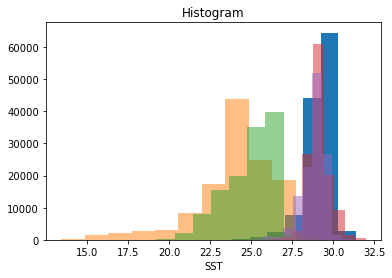

In [95]:
ds_GOM_small.SST.isel(time=0).plot.hist()
ds_GOM_small.SST.isel(time=2400).plot.hist(alpha=0.5)
ds_GOM_small.SST.isel(time=4800).plot.hist(alpha=0.5)
ds_GOM_small.SST.isel(time=7200).plot.hist(alpha=0.5)
ds_GOM_small.SST.isel(time=-1).plot.hist(alpha=0.5)

(array([  100.,    92.,   112.,   136.,   135.,   182.,   203.,   210.,
          271.,   331.,   539.,   854.,  1551.,  3572.,  5567.,  4647.,
         4779., 13242., 30382., 11864., 23231., 18249.,   862.,   347.,
          221.,   180.,   129.,   127.,    71.,    77.]),
 array([32. , 32.2, 32.4, 32.6, 32.8, 33. , 33.2, 33.4, 33.6, 33.8, 34. ,
        34.2, 34.4, 34.6, 34.8, 35. , 35.2, 35.4, 35.6, 35.8, 36. , 36.2,
        36.4, 36.6, 36.8, 37. , 37.2, 37.4, 37.6, 37.8, 38. ]),
 <BarContainer object of 30 artists>)

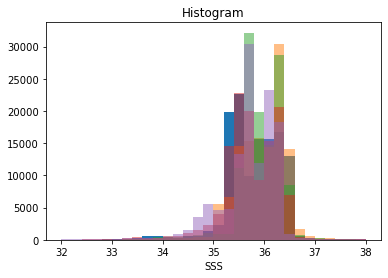

In [105]:
ds_GOM_small.SSS.isel(time=0).plot.hist(bins=np.linspace(32, 38,31))
ds_GOM_small.SSS.isel(time=2400).plot.hist(bins=np.linspace(32, 38,31), alpha=0.5)
ds_GOM_small.SSS.isel(time=4800).plot.hist(bins=np.linspace(32, 38,31), alpha=0.5)
ds_GOM_small.SSS.isel(time=7200).plot.hist(bins=np.linspace(32, 38,31), alpha=0.5)
ds_GOM_small.SSS.isel(time=-1).plot.hist(bins=np.linspace(32, 38,31), alpha=0.5)

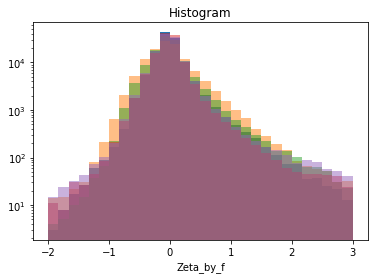

In [106]:
ds_GOM_small.Zeta_by_f.isel(time=0).plot.hist(bins=np.linspace(-2, 3,31))
ds_GOM_small.Zeta_by_f.isel(time=2400).plot.hist(bins=np.linspace(-2, 3,31), alpha=0.5)
ds_GOM_small.Zeta_by_f.isel(time=4800).plot.hist(bins=np.linspace(-2, 3,31), alpha=0.5)
ds_GOM_small.Zeta_by_f.isel(time=7200).plot.hist(bins=np.linspace(-2, 3,31), alpha=0.5)
ds_GOM_small.Zeta_by_f.isel(time=-1).plot.hist(bins=np.linspace(-2, 3,31), alpha=0.5)
plt.yscale('log')

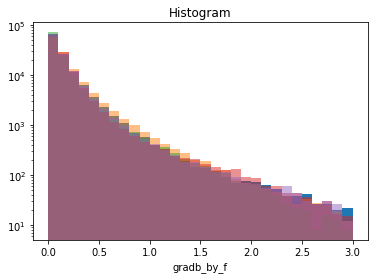

In [107]:
ds_GOM_small.gradb_by_f.isel(time=0).plot.hist(bins=np.linspace(0, 3,31))
ds_GOM_small.gradb_by_f.isel(time=2400).plot.hist(bins=np.linspace(0, 3,31), alpha=0.5)
ds_GOM_small.gradb_by_f.isel(time=4800).plot.hist(bins=np.linspace(0, 3,31), alpha=0.5)
ds_GOM_small.gradb_by_f.isel(time=7200).plot.hist(bins=np.linspace(0, 3,31), alpha=0.5)
ds_GOM_small.gradb_by_f.isel(time=-1).plot.hist(bins=np.linspace(0, 3,31), alpha=0.5)
plt.yscale('log')

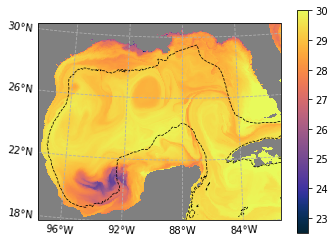

In [108]:
fig = plt.figure(figsize=(12,9))
fig.set_tight_layout(True)

ax = fig.add_subplot(2, 2, 1, projection=ccrs.LambertConformal(central_longitude=-88, central_latitude=25))
ax.set_extent([-97.5, -81.5, 18, 30.5], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=[-96, -92, -88, -84], 
                  ylocs=[18,22,26,30], linestyle='--',
                 x_inline=False)
    

gl.top_labels = False
gl.right_labels = False
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER

plt.pcolormesh(XC, YC,
    ds_GOM_small.SST.isel(time=0), vmin=22.5, vmax=30., cmap=cm.thermal,transform=ccrs.PlateCarree())
plt.colorbar()

plt.contour(XC, YC, ds_GOM_small.Depth, levels=[500], colors='k',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )
plt.contourf(XC, YC, ds_GOM_small.Depth, levels=[0 , 0.1], colors='gray',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )

plt.tight_layout()

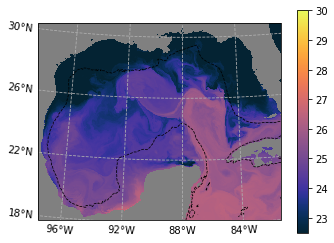

In [109]:
fig = plt.figure(figsize=(12,9))
fig.set_tight_layout(True)

ax = fig.add_subplot(2, 2, 1, projection=ccrs.LambertConformal(central_longitude=-88, central_latitude=25))
ax.set_extent([-97.5, -81.5, 18, 30.5], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=[-96, -92, -88, -84], 
                  ylocs=[18,22,26,30], linestyle='--',
                 x_inline=False)
    

gl.top_labels = False
gl.right_labels = False
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER

plt.pcolormesh(XC, YC,
    ds_GOM_small.SST.isel(time=4500), vmin=22.5, vmax=30., cmap=cm.thermal,transform=ccrs.PlateCarree())
plt.colorbar()

plt.contour(XC, YC, ds_GOM_small.Depth, levels=[500], colors='k',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )
plt.contourf(XC, YC, ds_GOM_small.Depth, levels=[0 , 0.1], colors='gray',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )

plt.tight_layout()

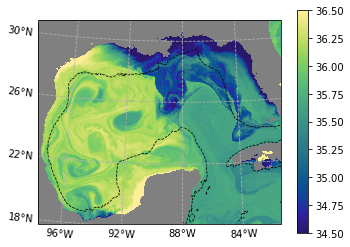

In [114]:
fig = plt.figure(figsize=(12,9))
fig.set_tight_layout(True)

ax = fig.add_subplot(2, 2, 1, projection=ccrs.LambertConformal(central_longitude=-88, central_latitude=25))
ax.set_extent([-97.5, -81.5, 18, 31], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=[-96, -92, -88, -84], 
                  ylocs=[18,22,26,30], linestyle='--',
                 x_inline=False)
    

gl.top_labels = False
gl.right_labels = False
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER

plt.pcolormesh(XC, YC,
    ds_GOM_small.SSS.isel(time=-1), vmin=34.5, vmax= 36.5, cmap=cm.haline, transform=ccrs.PlateCarree())
plt.colorbar()
plt.contour(XC, YC, ds_GOM_small.Depth, levels=[500], colors='k',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )
plt.contourf(XC, YC, ds_GOM_small.Depth, levels=[0 , 0.1], colors='gray',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )

plt.tight_layout()

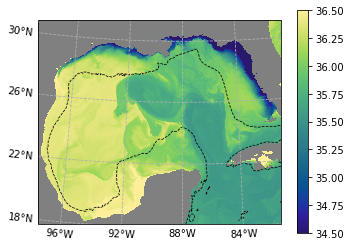

In [115]:
fig = plt.figure(figsize=(12,9))
fig.set_tight_layout(True)

ax = fig.add_subplot(2, 2, 1, projection=ccrs.LambertConformal(central_longitude=-88, central_latitude=25))
ax.set_extent([-97.5, -81.5, 18, 31], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=[-96, -92, -88, -84], 
                  ylocs=[18,22,26,30], linestyle='--',
                 x_inline=False)
    

gl.top_labels = False
gl.right_labels = False
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER

plt.pcolormesh(XC, YC,
    ds_GOM_small.SSS.isel(time=4500), vmin=34.5, vmax= 36.5, cmap=cm.haline, transform=ccrs.PlateCarree())
plt.colorbar()
plt.contour(XC, YC, ds_GOM_small.Depth, levels=[500], colors='k',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )
plt.contourf(XC, YC, ds_GOM_small.Depth, levels=[0 , 0.1], colors='gray',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )

plt.tight_layout()

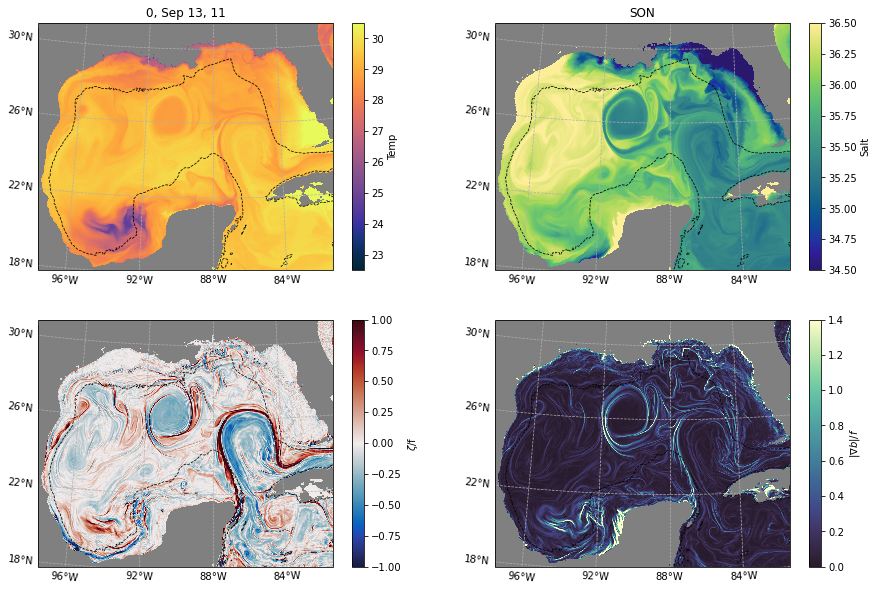

In [128]:
fig = plt.figure(figsize=(15,10))
custom_plotfunc(ds_GOM2, fig, 0)

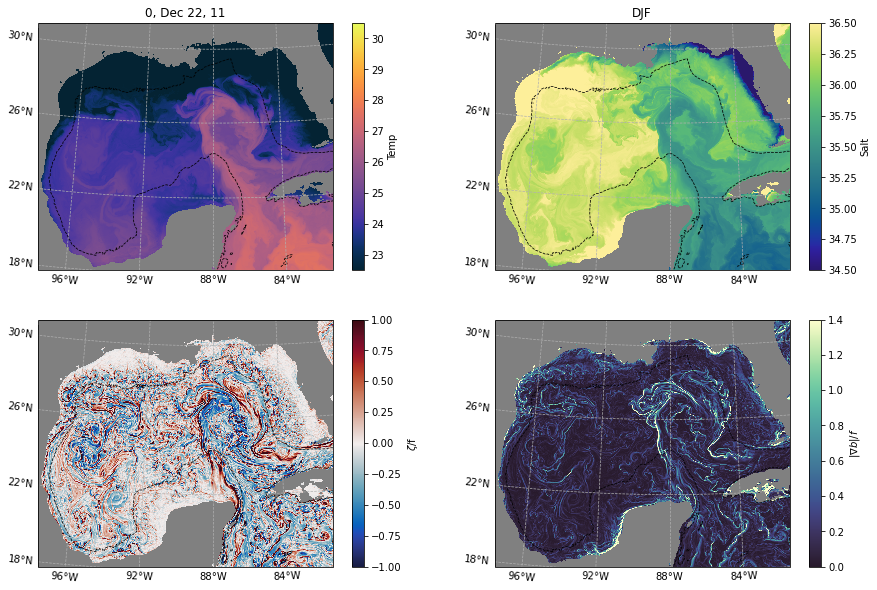

In [129]:
fig = plt.figure(figsize=(15,10))
custom_plotfunc(ds_GOM2, fig, 2400)

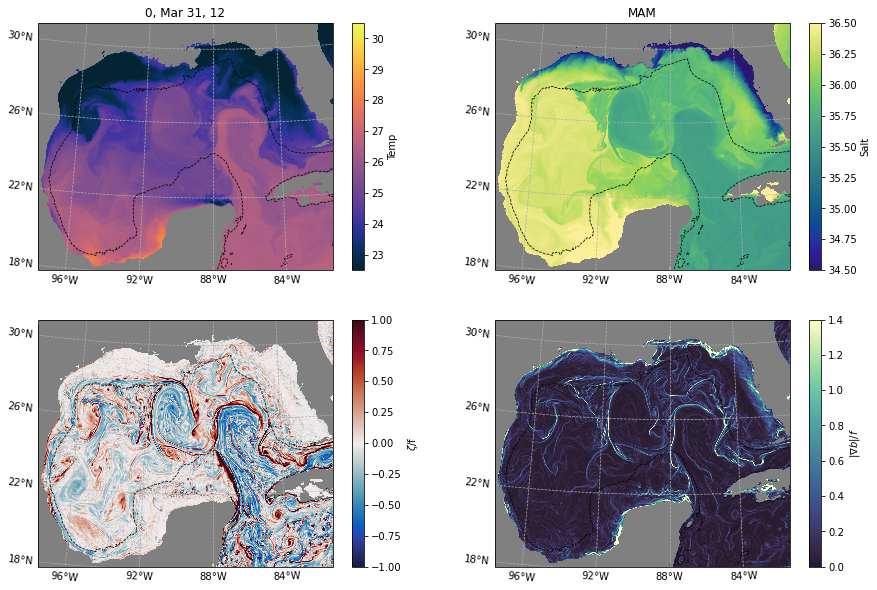

In [130]:
fig = plt.figure(figsize=(15,10))
custom_plotfunc(ds_GOM2, fig, 4800)

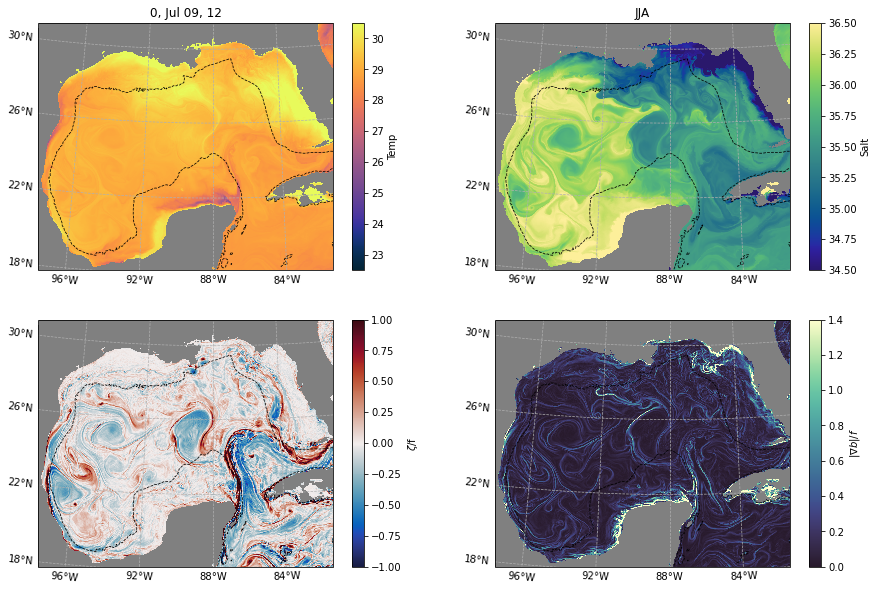

In [131]:
fig = plt.figure(figsize=(15,10))
custom_plotfunc(ds_GOM2, fig, 7200)

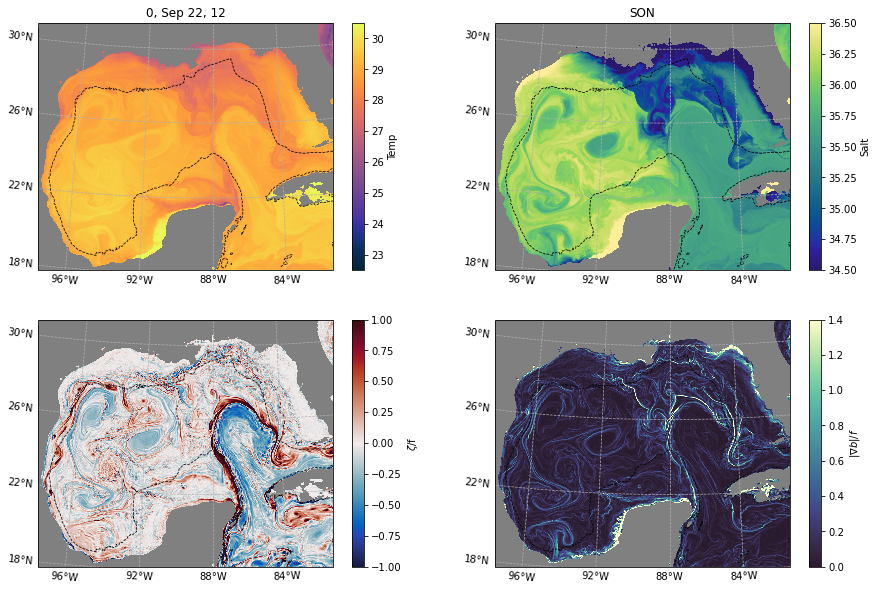

In [132]:
fig = plt.figure(figsize=(15,10))
custom_plotfunc(ds_GOM2, fig, 9000)

### Make movie

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
ds_GOM2 = ds_GOM2.chunk({'time':1, 'i':912, 'j':836})

In [21]:
def custom_plotfunc(ds_sel, fig, tt):
    
    #ds_sogos = ds_sogos.isel(i=slice(0,-1,4),j=slice(0,-1,4))
    XC = ds_sel.XC
    YC = ds_sel.YC 
    
    ax1=fig.add_subplot(2, 2, 1, projection=ccrs.LambertConformal(central_longitude=-88, central_latitude=25))
    ax2=fig.add_subplot(2, 2, 2, projection=ccrs.LambertConformal(central_longitude=-88, central_latitude=25))
    ax3=fig.add_subplot(2, 2, 3, projection=ccrs.LambertConformal(central_longitude=-88, central_latitude=25))
    ax4=fig.add_subplot(2, 2, 4, projection=ccrs.LambertConformal(central_longitude=-88, central_latitude=25))
    
    # Plot 1
    ax1.set_extent([-97.5, -81.5, 18, 31], ccrs.PlateCarree())
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                       xlocs=[-96, -92, -88, -84], ylocs = [18,22,26,30], 
                       linestyle='--', linewidth=0.7, x_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    p1 = ax1.pcolormesh(XC, YC, ds_sel.SST.isel(time=tt), cmap=cm.thermal, 
                        transform=ccrs.PlateCarree(),
                        vmin=22.5, vmax=30.)
    ax1.contour(XC, YC, ds_sel.Depth, levels=[500], colors='k',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )
    ax1.contourf(XC, YC, ds_sel.Depth, levels=[0 , 0.1], colors='gray',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )

    cbar1 = fig.colorbar(p1 , ax=ax1)
    cbar1.ax.set_ylabel('Temp')
    ax1.set_title(str((ds_sel.time.isel(time=tt)).dt.strftime("%-H, %b %d, %y").values))

    # Plot 2
    ax2.set_extent([-97.5, -81.5, 18, 31], ccrs.PlateCarree())
    gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                       xlocs=[-96, -92, -88, -84], ylocs = [18,22,26,30], 
                       linestyle='--', linewidth=0.7, x_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    p2 = ax2.pcolormesh(XC, YC, ds_sel.SSS.isel(time=tt), cmap=cm.haline, 
                        transform=ccrs.PlateCarree(),
                       vmin=34.5, vmax=36.5)
    ax2.contour(XC, YC, ds_sel.Depth, levels=[500], colors='k',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )
    ax2.contourf(XC, YC, ds_sel.Depth, levels=[0 , 0.1], colors='gray',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )
    cbar2 = fig.colorbar(p2 , ax=ax2)
    cbar2.ax.set_ylabel('Salt')
    ax2.set_title(str((ds_sel.time.isel(time=tt)).dt.season.values))

    # Plot 3
    ax3.set_extent([-97.5, -81.5, 18, 31], ccrs.PlateCarree())
    gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                       xlocs=[-96, -92, -88, -84], ylocs = [18,22,26,30], 
                       linestyle='--', linewidth=0.7, x_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    p3 = ax3.pcolormesh(XC, YC, ds_sel.Zeta_by_f.isel(time=tt), cmap=cm.balance, transform=ccrs.PlateCarree(),
                       vmin=-1, vmax=1)
    ax3.contour(XC, YC, ds_sel.Depth, levels=[500], colors='k',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )
    ax3.contourf(XC, YC, ds_sel.Depth, levels=[0 , 0.1], colors='gray',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )
    cbar3 = fig.colorbar(p3 , ax=ax3)
    cbar3.ax.set_ylabel(r'$\zeta$/f')

    # Plot 4
    ax4.set_extent([-97.5, -81.5, 18, 31], ccrs.PlateCarree())
    gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                       xlocs=[-96, -92, -88, -84], ylocs = [18,22,26,30], 
                       linestyle='--', linewidth=0.7, x_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    p4 = ax4.pcolormesh(XC, YC, ds_sel.gradb_by_f.isel(time=tt), cmap=cm.deep_r, transform=ccrs.PlateCarree(),
                       vmin=0, vmax=1.4)
    ax4.contour(XC, YC, ds_sel.Depth, levels=[500], colors='k',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 )
    ax4.contourf(XC, YC, ds_sel.Depth, levels=[0 , 0.1], colors='gray',transform=ccrs.PlateCarree(), linestyles='--', linewidths=.75 ) 
    cbar4 = fig.colorbar(p4 , ax=ax4)
    cbar4.ax.set_ylabel(r'$|\nabla b|/f$')
    
    fig.tight_layout()


In [22]:
mov_custom = Movie(ds_GOM2.isel(time=slice(0,-1,6)), # passing data array that will never be used by custom plotfunc
                   plotfunc=custom_plotfunc, 
                   input_check=False)

In [1]:
2+2

4

In [ ]:
mov_custom.save('movie_GOM/movie_GOM.mp4'
                , overwrite_existing=True, remove_frames=False,
               verbose=True, start_frame=129)

movie_GOM/movie_GOM.mp4


### What went wrong with parallelization? 
- There is a check that breaks if a dataset is passed instead of data array. Got around this by doing a call to a global variable in the function. 
- Unsure how to set up dask on the cloud. Would either just result in notebook crashing, or if the extra keywords were used then would output some of the frames and not othere and would just sit and keep waiting.


In [ ]:
mov_custom.save('movie_SO/movie_SO_para.mp4',
                overwrite_existing=True, 
                remove_frames=False,
                parallel=True, parallel_compute_kwargs=dict(scheduler="processes", num_workers=8),
                verbose=True)

In [111]:
mov_custom = Movie(ds_SO.chunk({'time':1}).isel(time=slice(4800,4825)), 
                   custom_plotfunc, input_check=False)

In [112]:
mov_custom.save('movie_SO/movie_SO3.mp4'
                , overwrite_existing=True, remove_frames=False,
               verbose=True)

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9.3.0 (crosstool-NG 1.24.0.133_b0863d8_dirty)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1609680890771/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1609680890771/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1609680890771/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavforma

In [113]:
mov_custom = Movie(ds_SO.chunk({'time':1}).isel(time=slice(7200,7225)), 
                   custom_plotfunc, input_check=False)

In [114]:
mov_custom.save('movie_SO/movie_SO4.mp4'
                , overwrite_existing=True, remove_frames=False,
               verbose=True)

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9.3.0 (crosstool-NG 1.24.0.133_b0863d8_dirty)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1609680890771/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1609680890771/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1609680890771/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavforma

In [16]:
def custom_plotfunc(ds_sogos, fig, tt):
    
    ds_sogos = ds_sogos.isel(i=slice(0,-1,4),j=slice(0,-1,4))
    XC = ds_sogos.XC
    YC = ds_sogos.YC 
    
    ax = fig.subplots(2, 2)

    ax1= ax[0,0]
    ax2= ax[0,1]
    ax3= ax[1,0]
    ax4= ax[1,1]

    p1 = ax1.pcolormesh(XC, YC, ds_sogos.SST.isel(time=tt), cmap=cm.thermal,
                        vmin=24.5, vmax=30.5)
    
    cbar1 = fig.colorbar(p1 , ax=ax1)
    cbar1.ax.set_ylabel('Temp')
    ax1.set_aspect(1.25)
    ax1.set_title(str((ds_sogos.time.isel(time=tt)).dt.strftime("%-H, %b %d, %y").values))

    p2 = ax2.pcolormesh(XC, YC, ds_sogos.SSS.isel(time=tt), cmap=cm.haline,
                       vmin=29, vmax=36.8)
        
    cbar2 = fig.colorbar(p2 , ax=ax2)
    cbar2.ax.set_ylabel('Salt')
    ax2.set_aspect(1.25)
    ax2.set_title(str((ds_sogos.time.isel(time=tt)).dt.season.values))

    p3 = ax3.pcolormesh(XC, YC, ds_sogos.SSD.isel(time=tt), cmap=cm.dense,
                       vmin=1017, vmax=1025)
    
    cbar3 = fig.colorbar(p3 , ax=ax3)
    cbar3.ax.set_ylabel('Density')
    ax3.set_aspect(1.25)
    #ax3.set_title(str((ds_sogos.time.isel(time=tt)).dt.strftime("%b %d, %y").values))

    p4 = ax4.pcolormesh(XC, YC, ds_sogos.Eta.isel(time=tt), cmap=cm.balance,
                       vmin=-2, vmax=2)
        
    cbar4 = fig.colorbar(p4 , ax=ax4)
    cbar4.ax.set_ylabel('SSH')
    ax4.set_aspect(1.25)
#    ax4.set_title(str((ds_sogos.time.isel(time=tt)).dt.season.values))
    
    fig.tight_layout()


In [ ]:
2+2

In [ ]:
mov_custom.save('movie_IO/movie_IO.mp4'
                ,progress=True,remove_frames=False, overwrite_existing=True,
               remove_movie=False, start_frame=4514)

movie_IO/movie_IO.mp4


## Movie of surface kinematics

In [12]:
KE = 0.5*(grid.interp(ds.U,'X',boundary='extend')**2 + grid.interp(ds.V,'Y',boundary='extend')**2) 

zeta = (-grid.diff(ds.U * coords.dxC, 'Y', boundary='extend') + grid.diff(ds.V * coords.dyC, 'X', boundary='extend'))/coords.rAz
zeta = grid.interp(grid.interp(zeta, 'X', boundary='extend'), 'Y', boundary='extend')

strain1 = (grid.diff(ds.U * coords.dyG, 'X', boundary='extend') - grid.diff(ds.V * coords.dxG, 'Y',boundary='extend')) / coords.rA
strain2 = (grid.diff(ds.U * coords.dxC, 'Y', boundary='extend') + grid.diff(ds.V * coords.dyC, 'X', boundary='extend'))/coords.rAz
strain2 = grid.interp(grid.interp(strain2, 'X', boundary='extend'), 'Y', boundary='extend')
strain = (strain1**2 + strain2**2)**0.5

gradD = (grid.interp(grid.diff(ds.SSD,'X',boundary='extend')/coords.dxC, 'X', boundary='extend')**2 +
         grid.interp(grid.diff(ds.SSD,'Y',boundary='extend')/coords.dyC, 'Y', boundary='extend')**2)**0.5

In [13]:
zeta_sogos = zeta.where(sel_XC & sel_YC, drop=True)
strain_sogos = strain.where(sel_XC & sel_YC, drop=True)
gradD_sogos = gradD.where(sel_XC & sel_YC, drop=True)
KE_sogos = KE.where(sel_XC & sel_YC, drop=True)
SSD_sogos = ds.SSD.where(sel_XC & sel_YC, drop=True)

In [14]:
f = 2*(2*np.pi/24/3600)*np.sin(-55*np.pi/360)

ds_kinem_sogos = xr.merge([zeta_sogos.rename('Vorticity')/f,
                           strain_sogos.rename('Strain')/(-f), 
                           gradD_sogos.rename('rho_grad'),
                           KE_sogos.rename('KE'),
                          SSD_sogos])
# f=2*omega*sin(theta)


In [15]:
def custom_plotfunc2(ds_kinem_sogos, fig, tt):
    
    ds_kinem_sogos = ds_kinem_sogos.isel(i=slice(0,-1,1),j=slice(0,-1,1))

    XC = ds_kinem_sogos.XC
    YC = ds_kinem_sogos.YC 

    ax = fig.subplots(2, 2)

    ax1= ax[0,0]
    ax2= ax[0,1]
    ax3= ax[1,0]
    ax4= ax[1,1]

    p1 = ax1.pcolormesh(XC, YC, ds_kinem_sogos.KE.isel(time=tt), cmap=cm.speed_r, vmin=0, vmax=0.8)
    ax1.contour(XC, YC, ds_kinem_sogos.SSD.isel(time=tt), levels=[1027.1], colors='k',linewidths=1)
    ax1.plot(glid659.longitude, glid659.latitude,color='white', linewidth=2)
    cbar1 = fig.colorbar(p1 , ax=ax1)
    cbar1.ax.set_ylabel('KE (m/s)')
    ax1.set_aspect(1.25)
    ax1.set_title(str((ds_kinem_sogos.time.isel(time=tt)).dt.strftime("%b %d, %y").values))

    p2 = ax2.pcolormesh(XC, YC, ds_kinem_sogos.Vorticity.isel(time=tt), cmap=cm.curl, vmin=-1, vmax=1)
    ax2.contour(XC, YC, ds_kinem_sogos.SSD.isel(time=tt), levels=[1027.1], colors='k',linewidths=1)
    ax2.plot(glid659.longitude, glid659.latitude,color='white', linewidth=2)
    cbar2 = fig.colorbar(p2 , ax=ax2)
    cbar2.ax.set_ylabel('Vorticity/f')
    ax2.set_aspect(1.25)
    ax2.set_title(str((ds_kinem_sogos.time.isel(time=tt)).dt.season.values))

    p3 = ax3.pcolormesh(XC, YC, ds_kinem_sogos.Strain.isel(time=tt), cmap=cm.amp, vmin=0, vmax=1)
    ax3.contour(XC, YC, ds_kinem_sogos.SSD.isel(time=tt), levels=[1027.1], colors='k',linewidths=1)
    ax3.plot(glid659.longitude, glid659.latitude,color='white', linewidth=2)
    cbar3 = fig.colorbar(p3, ax=ax3)
    cbar3.ax.set_ylabel('Strain/f')
    ax3.set_aspect(1.25)

    p4 = ax4.pcolormesh(XC, YC, ds_kinem_sogos.rho_grad.isel(time=tt), cmap=cm.ice, vmin=0.1e-5, vmax= 3.5e-5)
    ax4.contour(XC, YC, ds_kinem_sogos.SSD.isel(time=tt), levels=[1027.1], colors='k',linewidths=1)
    ax4.plot(glid659.longitude, glid659.latitude,color='white', linewidth=2)
    cbar4 = fig.colorbar(p4, ax=ax4)
    cbar4.ax.set_ylabel(r'$|\nabla \rho|$')
    ax4.set_aspect(1.25)

    fig.tight_layout()

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
mov_custom_2 = Movie(ds_kinem_sogos.isel(time=slice(0,-1,24)), 
                   custom_plotfunc2, 
                   input_check=False)

In [18]:
mov_custom_2.save('movie_KZSG/movie_KZSG.mp4'
                ,progress=True,remove_frames=False,
                remove_movie=False, start_frame=113)

movie_KZSG/movie_KZSG.mp4



Movie created at movie_KZSG.mp4


In [20]:
import os
dirname = os.path.dirname('movie_KZSG/movie_KZSG.mp4')

In [21]:
dirname

'movie_KZSG'

In [25]:
#from xmovie.core import frame_save

def frame_save(fig, frame, odir=None, frame_pattern="frame_%05d.png", dpi=100):
    fig.savefig(
        os.path.join(odir, frame_pattern % (frame)),
        dpi=dpi,
        facecolor=fig.get_facecolor(),
        transparent=True,
    )
    # I am trying everything to *wipe* this figure, hoping that it could
    # help with the dask glitches I experienced earlier.
    # TBD if this is all needed...how this might affect performance.
    plt.close('all')
    #del fig
    #gc.collect(2)


In [26]:
%matplotlib notebook

In [27]:
for fi in range(67,75):
    fig, ax, pp = mov_custom_2.render_frame(fi)
    frame_save(fig, fi, odir=dirname, frame_pattern=mov_custom_2.frame_pattern, 
               dpi=mov_custom_2.dpi )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>